In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
df = pd.read_csv("../Data_Preprocessing/df_nnz_Vmax.csv")

Удаляю Km

In [52]:
df.shape

(1130, 43)

In [53]:
df.drop('Km', axis=1, inplace=True)

In [54]:
df.shape

(1130, 42)

Смотрю все ли параметры в числовом значении

In [55]:
df.dtypes

Vmax                     object
activity                  int64
X                       float64
IR                      float64
pot2                    float64
ph                      float64
temp                    float64
dstr                      int64
cryst                   float64
lgCmin                  float64
lgCmax                  float64
lgCconst                float64
lgCcat                  float64
lgvolume                float64
Sufrace                 float64
VSA_EState8             float64
BalabanJ                float64
MinAbsEStateIndex       float64
MinEStateIndex          float64
VSA_EState4             float64
MinPartialCharge        float64
XLogP                   float64
MinPartialCharge.1      float64
MaxPartialCharge.1      float64
BCUT2D_CHGLO            float64
polym                   float64
Mcoat_log               float64
MolWt_log               float64
PEOE_VSA7_log           float64
PEOE_VSA8_log           float64
PEOE_VSA9_log           float64
Kappa2_l

Vmax привожу в числовой вид

In [56]:
def to_numeric_column(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [57]:
df = to_numeric_column(df, 'Vmax')

Убеждаюсь, что Vmax теперь float

In [58]:
df.dtypes

Vmax                    float64
activity                  int64
X                       float64
IR                      float64
pot2                    float64
ph                      float64
temp                    float64
dstr                      int64
cryst                   float64
lgCmin                  float64
lgCmax                  float64
lgCconst                float64
lgCcat                  float64
lgvolume                float64
Sufrace                 float64
VSA_EState8             float64
BalabanJ                float64
MinAbsEStateIndex       float64
MinEStateIndex          float64
VSA_EState4             float64
MinPartialCharge        float64
XLogP                   float64
MinPartialCharge.1      float64
MaxPartialCharge.1      float64
BCUT2D_CHGLO            float64
polym                   float64
Mcoat_log               float64
MolWt_log               float64
PEOE_VSA7_log           float64
PEOE_VSA8_log           float64
PEOE_VSA9_log           float64
Kappa2_l

Тут я анализирую, и вижу наличие пропусков (NaN) в долях

In [59]:
df_nan = df.isna().mean().sort_values(ascending = False)
df_nan.head()

Vmax                  0.062832
Kappa2_log            0.000000
MaxPartialCharge.1    0.000000
BCUT2D_CHGLO          0.000000
polym                 0.000000
dtype: float64

In [60]:
df = df.dropna(subset=['Vmax'], axis =0)

In [61]:
df_nan = df.isna().mean().sort_values(ascending = False)
df_nan.head()

Vmax                  0.0
Kappa2_log            0.0
MaxPartialCharge.1    0.0
BCUT2D_CHGLO          0.0
polym                 0.0
dtype: float64

Просмотрю все сделанные изменения

In [62]:
df

,Vmax,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,EState_VSA6_log,EState_VSA4_log,SMR_VSA7_log,Complexity1_log,Complexity_log,TPSA_log,TPSA1_log,TPSA2_log,MaxEStateIndex.1_log,MaxEStateIndex.2_log
0,1.376300,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,0.176091,...,0.000000,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759
1,0.264300,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,0.176091,...,0.000000,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759
2,8.363000,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.301030,...,0.000000,2.552693,2.497497,0.000000,0.000000,3.618993,3.701302,3.951244,1.791759,1.790549
3,0.438200,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.301030,...,0.000000,2.552693,2.497497,0.000000,0.000000,3.618993,3.701302,3.951244,1.791759,1.790549
4,1.027200,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.698970,...,0.000000,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0.000002,2,2.280,1.350,1.20,7.00,41.4,3,6.8,-1.221849,...,0.000000,0.000000,0.000000,5.420535,0.000000,4.883786,3.951244,3.823847,1.790549,0.000000
1126,0.000252,2,2.280,1.350,1.20,3.00,33.0,1,6.8,-2.000000,...,3.189054,3.402360,4.785979,5.420535,6.586172,5.928924,3.951244,3.701302,1.790549,0.000000
1127,0.000177,2,2.280,1.350,1.20,7.00,33.0,1,6.8,-1.221849,...,3.189054,3.402360,4.785979,5.420535,6.586172,5.928924,3.951244,3.701302,1.790549,0.000000
1128,0.000041,2,1.937,0.853,0.78,4.00,42.4,1,6.8,-2.000000,...,0.000000,0.000000,0.000000,5.420535,0.000000,3.401197,3.951244,3.823847,1.790549,0.000000


Логорифмирую Vmax

In [63]:
df.loc[:, 'Vmaxlog'] = np.log10(df['Vmax'])

In [64]:
df

,Vmax,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,...,EState_VSA4_log,SMR_VSA7_log,Complexity1_log,Complexity_log,TPSA_log,TPSA1_log,TPSA2_log,MaxEStateIndex.1_log,MaxEStateIndex.2_log,Vmaxlog
0,1.376300,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,0.176091,...,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759,0.138713
1,0.264300,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,0.176091,...,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759,-0.577903
2,8.363000,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.301030,...,2.552693,2.497497,0.000000,0.000000,3.618993,3.701302,3.951244,1.791759,1.790549,0.922362
3,0.438200,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.301030,...,2.552693,2.497497,0.000000,0.000000,3.618993,3.701302,3.951244,1.791759,1.790549,-0.358328
4,1.027200,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.698970,...,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0.000002,2,2.280,1.350,1.20,7.00,41.4,3,6.8,-1.221849,...,0.000000,0.000000,5.420535,0.000000,4.883786,3.951244,3.823847,1.790549,0.000000,-5.821023
1126,0.000252,2,2.280,1.350,1.20,3.00,33.0,1,6.8,-2.000000,...,3.402360,4.785979,5.420535,6.586172,5.928924,3.951244,3.701302,1.790549,0.000000,-3.598599
1127,0.000177,2,2.280,1.350,1.20,7.00,33.0,1,6.8,-1.221849,...,3.402360,4.785979,5.420535,6.586172,5.928924,3.951244,3.701302,1.790549,0.000000,-3.752027
1128,0.000041,2,1.937,0.853,0.78,4.00,42.4,1,6.8,-2.000000,...,0.000000,0.000000,5.420535,0.000000,3.401197,3.951244,3.823847,1.790549,0.000000,-4.389340


После нормализации данных по Vmax, удалила этот столбец, так как информативен столбец Vmaxlog

In [65]:
df = df.drop('Vmax', axis=1)

In [66]:
df

,activity,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,lgCmax,...,EState_VSA4_log,SMR_VSA7_log,Complexity1_log,Complexity_log,TPSA_log,TPSA1_log,TPSA2_log,MaxEStateIndex.1_log,MaxEStateIndex.2_log,Vmaxlog
0,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,0.176091,0.176091,...,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759,0.138713
1,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,0.176091,0.176091,...,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759,-0.577903
2,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.301030,1.397940,...,2.552693,2.497497,0.000000,0.000000,3.618993,3.701302,3.951244,1.791759,1.790549,0.922362
3,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.301030,1.397940,...,2.552693,2.497497,0.000000,0.000000,3.618993,3.701302,3.951244,1.791759,1.790549,-0.358328
4,1,2.757,1.071,-0.05,4.00,37.0,3,7.0,-0.698970,2.000000,...,2.552693,2.497497,5.420535,0.000000,3.618993,3.951244,3.701302,1.790549,1.791759,0.011655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,2,2.280,1.350,1.20,7.00,41.4,3,6.8,-1.221849,-0.619789,...,0.000000,0.000000,5.420535,0.000000,4.883786,3.951244,3.823847,1.790549,0.000000,-5.821023
1126,2,2.280,1.350,1.20,3.00,33.0,1,6.8,-2.000000,-0.795880,...,3.402360,4.785979,5.420535,6.586172,5.928924,3.951244,3.701302,1.790549,0.000000,-3.598599
1127,2,2.280,1.350,1.20,7.00,33.0,1,6.8,-1.221849,-0.619789,...,3.402360,4.785979,5.420535,6.586172,5.928924,3.951244,3.701302,1.790549,0.000000,-3.752027
1128,2,1.937,0.853,0.78,4.00,42.4,1,6.8,-2.000000,-0.221849,...,0.000000,0.000000,5.420535,0.000000,3.401197,3.951244,3.823847,1.790549,0.000000,-4.389340


Матрица корреляции

Корреляция между activity и MaxEStateIndex.2_log: -0.81
Корреляция между Sufrace и Complexity_log: 0.85
Корреляция между MinPartialCharge и MolWt_log: -0.83
Корреляция между MinPartialCharge и Kappa2_log: -0.79
Корреляция между MinPartialCharge.1 и MaxPartialCharge.1: -0.82
Корреляция между MaxPartialCharge.1 и MinPartialCharge.1: -0.82
Корреляция между MaxPartialCharge.1 и Complexity1_log: 0.83
Корреляция между BCUT2D_CHGLO и MolWt_log: -0.80
Корреляция между Mcoat_log и MolWt_log: 0.83
Корреляция между Mcoat_log и TPSA_log: 0.76
Корреляция между MolWt_log и MinPartialCharge: -0.83
Корреляция между MolWt_log и BCUT2D_CHGLO: -0.80
Корреляция между MolWt_log и Mcoat_log: 0.83
Корреляция между MolWt_log и Kappa2_log: 0.80
Корреляция между MolWt_log и TPSA_log: 0.91
Корреляция между PEOE_VSA7_log и EState_VSA4_log: 0.82
Корреляция между PEOE_VSA7_log и SMR_VSA7_log: 0.77
Корреляция между Kappa2_log и MinPartialCharge: -0.79
Корреляция между Kappa2_log и MolWt_log: 0.80
Корреляция между ES

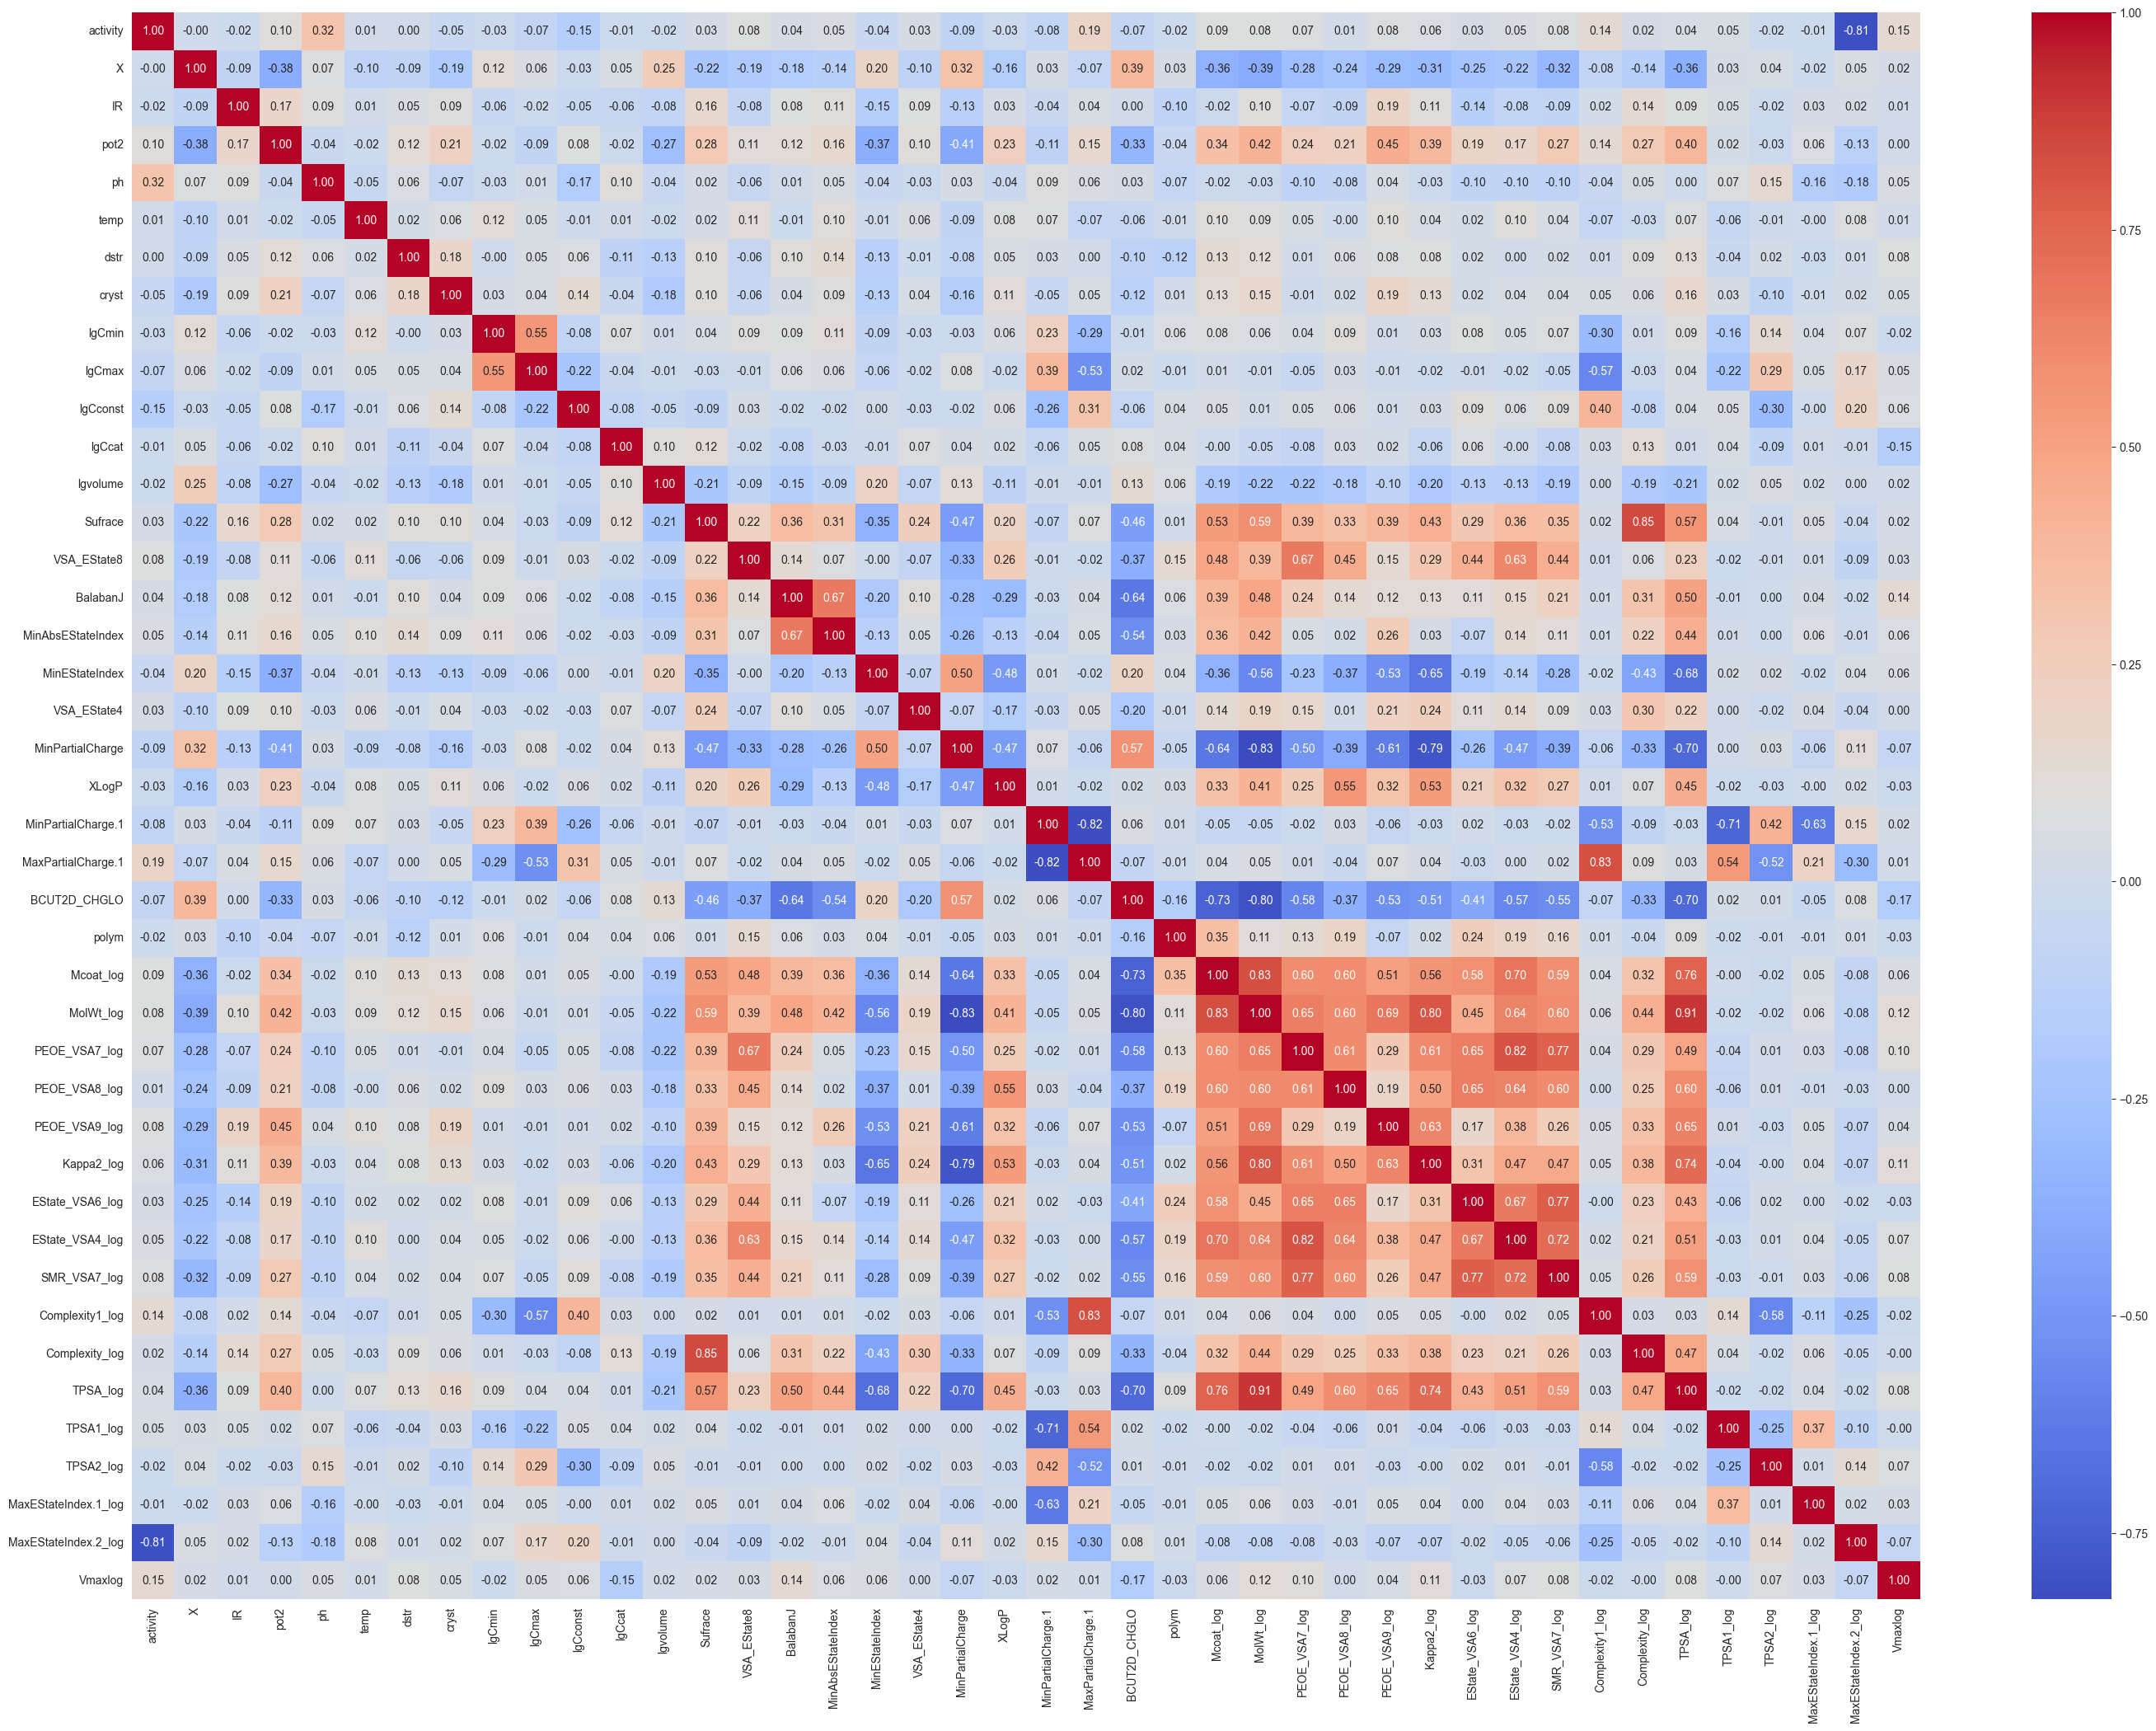

In [67]:
# Построение матрицы корреляции
correlation_matrix = df.corr()

# Настройка размера графика
plt.figure(figsize=(35, 25))

# Создание тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Нахождение столбцов с корреляцией более 75%
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.75]

# Фильтрация диагонали и столбцов, где корреляция с самим собой
high_correlation = high_correlation[high_correlation < 1]

# Вывод столбцов с корреляцией более 75%
columns_with_high_correlation = high_correlation.stack().index
for col1, col2 in columns_with_high_correlation:
    print(f"Корреляция между {col1} и {col2}: {correlation_matrix.loc[col1, col2]:.2f}")

# Отображение графика
plt.show()

In [68]:
columns_to_drop = ['MaxPartialCharge.1','Mcoat_log','activity','MolWt_log','PEOE_VSA7_log','Complexity_log']
df.drop(columns=columns_to_drop, inplace=True)

Корреляция между MinPartialCharge и Kappa2_log: -0.79
Корреляция между Kappa2_log и MinPartialCharge: -0.79
Корреляция между EState_VSA6_log и SMR_VSA7_log: 0.77
Корреляция между SMR_VSA7_log и EState_VSA6_log: 0.77


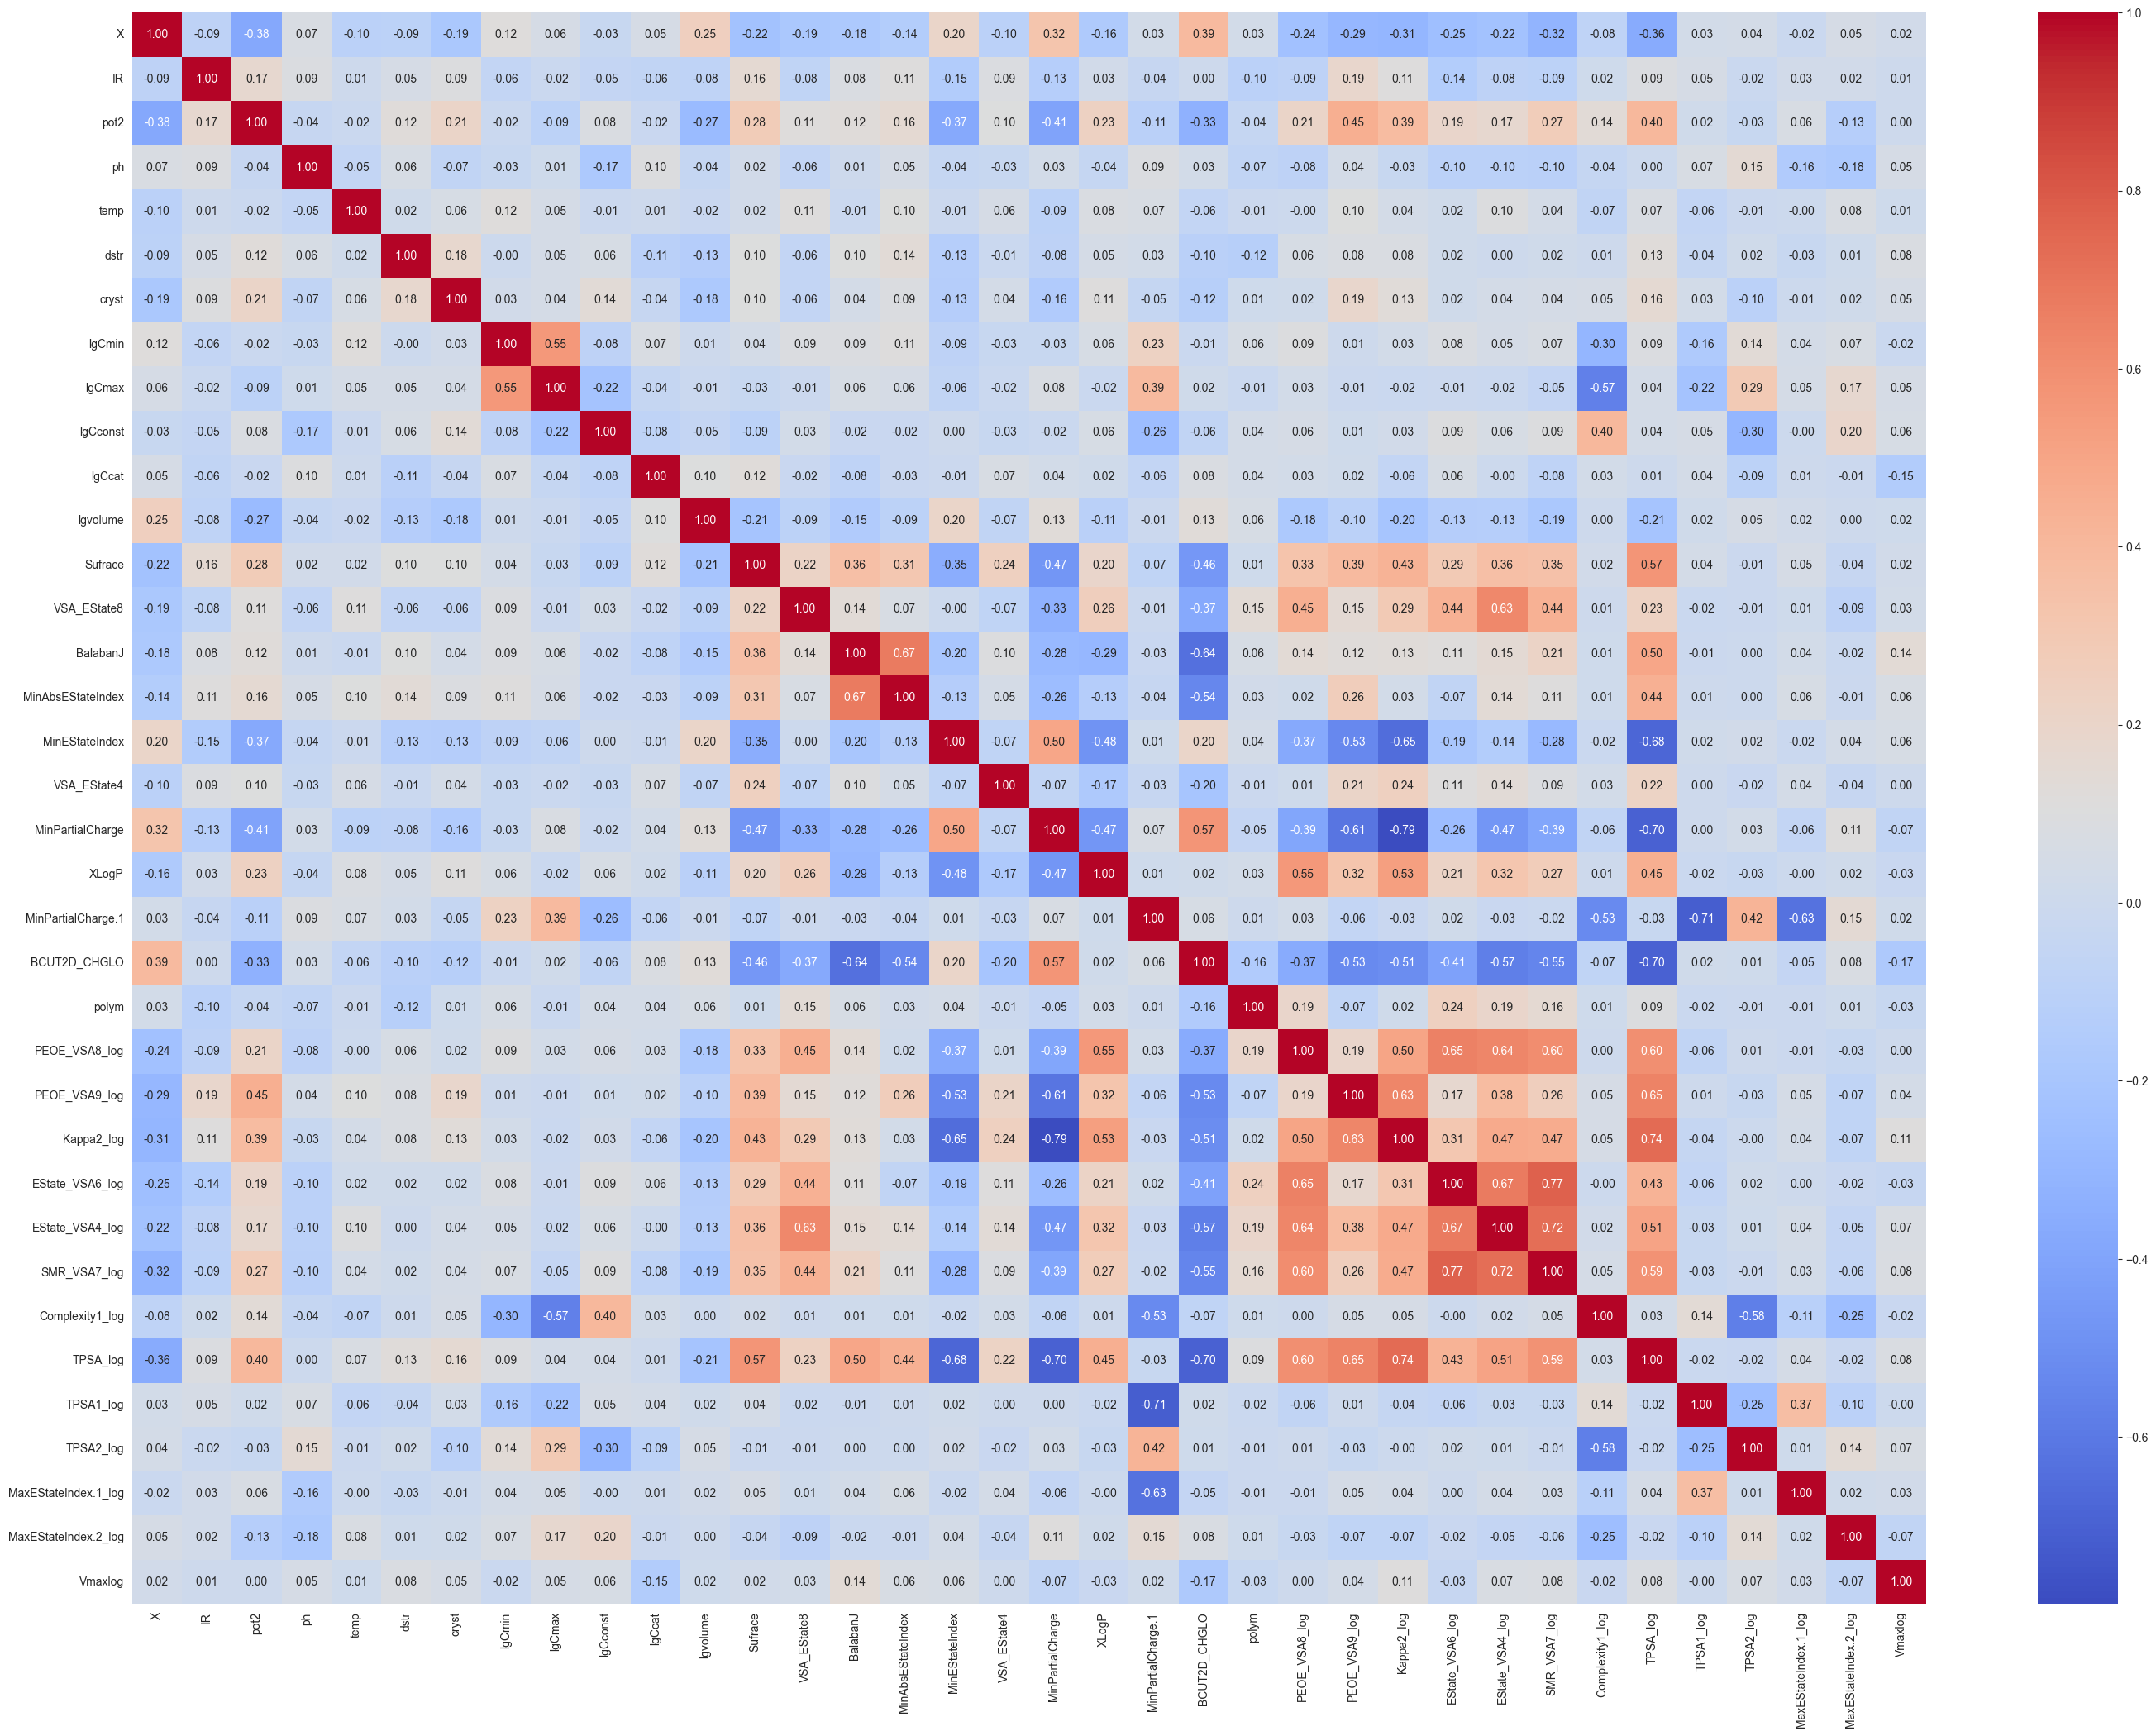

In [69]:
# Построение матрицы корреляции
correlation_matrix = df.corr()

# Настройка размера графика
plt.figure(figsize=(35, 25))

# Создание тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Нахождение столбцов с корреляцией более 75%
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.75]

# Фильтрация диагонали и столбцов, где корреляция с самим собой
high_correlation = high_correlation[high_correlation < 1]

# Вывод столбцов с корреляцией более 75%
columns_with_high_correlation = high_correlation.stack().index
for col1, col2 in columns_with_high_correlation:
    print(f"Корреляция между {col1} и {col2}: {correlation_matrix.loc[col1, col2]:.2f}")

# Отображение графика
plt.show()

In [70]:
df.describe()

,X,IR,pot2,ph,temp,dstr,cryst,lgCmin,lgCmax,lgCconst,...,EState_VSA6_log,EState_VSA4_log,SMR_VSA7_log,Complexity1_log,TPSA_log,TPSA1_log,TPSA2_log,MaxEStateIndex.1_log,MaxEStateIndex.2_log,Vmaxlog
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,...,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,2.527929,1.206676,0.292785,4.537616,33.278942,2.713881,6.036449,-1.250548,0.568012,0.485323,...,0.573097,0.951568,0.963771,2.958695,2.406137,3.927422,3.836257,1.793631,1.514950,-3.744783
std,0.268633,0.179893,0.580628,1.218244,9.432100,0.642174,1.604034,1.413556,1.204909,1.215957,...,1.057740,1.238118,1.380037,2.688157,2.257320,0.475094,0.218885,0.252684,0.668308,1.400119
min,1.830000,0.700000,-1.358000,2.000000,15.000000,1.000000,0.000000,-4.000000,-4.000000,-2.301030,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.701302,3.701302,0.000000,0.000000,-7.468521
25%,2.280000,1.083000,-0.077600,4.000000,25.000000,3.000000,6.000000,-2.301030,-0.221849,-0.143004,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.701302,3.701302,1.790549,1.790549,-4.494850
50%,2.579000,1.224000,0.069200,4.000000,31.200000,3.000000,7.000000,-1.301030,0.204120,0.000000,...,0.000000,0.000000,0.000000,5.420535,3.011113,3.951244,3.701302,1.790549,1.790549,-3.973875
75%,2.750000,1.320000,0.700000,4.500000,40.000000,3.000000,7.000000,-0.301030,1.397940,1.176091,...,0.000000,2.562298,2.547795,5.420535,4.674883,3.951244,3.951244,1.791759,1.791759,-3.384576
max,3.170000,1.710000,1.690000,10.000000,90.000000,3.000000,7.000000,2.944483,3.602060,3.875061,...,4.756298,4.433535,5.175934,6.190315,7.051345,6.783325,6.783325,2.496743,2.521040,4.777318


Посмотрела выбросы по всем столбцам, отсортировав по наибольшему

In [73]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Считаем выбросы для каждого столбца
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
outliers = outliers.sort_values(ascending=False)
outliers

EState_VSA6_log         247
polym                   246
XLogP                   243
Sufrace                 229
VSA_EState4             223
ph                      220
MaxEStateIndex.2_log    198
dstr                    193
cryst                   183
MinAbsEStateIndex       171
Vmaxlog                  88
MaxEStateIndex.1_log     88
MinPartialCharge.1       42
VSA_EState8              42
TPSA1_log                41
lgCcat                   41
lgCconst                 39
MinEStateIndex           27
TPSA2_log                13
lgvolume                 11
MinPartialCharge          8
IR                        8
pot2                      7
Kappa2_log                6
lgCmax                    5
temp                      3
lgCmin                    1
BCUT2D_CHGLO              0
PEOE_VSA8_log             0
PEOE_VSA9_log             0
BalabanJ                  0
EState_VSA4_log           0
SMR_VSA7_log              0
Complexity1_log           0
TPSA_log                  0
X                   